In [1]:
import findspark
findspark.init()
import pyspark as ps

In [2]:
conf = ps.SparkConf().setAppName("IPL_APP")
sc = ps.SparkContext(conf=conf)

In [40]:
op = sc.textFile("IPL_Record.csv")\
     .map(lambda x: x.split('\n'))\
     .map(lambda x: x[0].split(','))\
     .filter(lambda x: False if x[0] == 'Team' else True )\
     .map(lambda x: x[1:])\
     .map(lambda x: [int(a) if a.isdigit() else a for a in x])

In [41]:
op = op.collect()

In [42]:
import pandas as pd
df = pd.DataFrame(op)

In [43]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Aaron Finch,38,35,73,22,18,6,57,28,30,22,22,29,33,22
1,Devdutt Padikkal,76,5,83,99,16,49,50,31,41,40,30,108,10,67
2,Virat Kohli,34,5,1,95,51,114,38,55,52,24,65,11,19,37
3,de Villiers,71,46,87,17,23,10,108,12,88,20,47,22,43,44
4,Josh Philippe,11,2,25,27,29,33,26,33,35,24,31,43,40,17
5,Shivan Dube,63,64,38,4,17,30,4,31,34,30,32,6,27,41
6,Umesh Yadav,16,-2,21,28,23,31,33,35,35,20,30,29,26,31
7,W Sundar,4,38,35,6,26,68,56,16,4,43,10,17,52,31
8,N Saini,62,9,0,35,11,8,31,6,12,29,4,23,23,24
9,Steyn,27,-1,20,34,28,26,20,25,23,31,28,0,27,30


In [44]:
df = df.transpose()
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Aaron Finch,Devdutt Padikkal,Virat Kohli,de Villiers,Josh Philippe,Shivan Dube,Umesh Yadav,W Sundar,N Saini,Steyn,Chahal,Chris Morris,Adam Zampa,Gurkeerat Singh,Isuru Udana,Mohammed Siraj,Moin Ali,Shahbaz Ahmed
1,38,76,34,71,11,63,16,4,62,27,83,35,24,28,24,23,26,27
2,35,5,5,46,2,64,-2,38,9,-1,30,24,35,22,28,32,27,30
3,73,83,1,87,25,38,21,35,0,20,23,35,23,4,48,35,35,29
4,22,99,95,17,27,4,28,6,35,34,89,29,2,4,58,28,23,30
5,18,16,51,23,29,17,23,26,11,28,2,31,21,34,28,60,45,35
6,6,49,114,10,33,30,31,68,8,26,29,103,35,20,29,23,24,20
7,57,50,38,108,26,4,33,56,31,20,35,66,26,25,41,37,20,21
8,28,31,55,12,33,31,35,16,6,25,23,38,21,20,16,-2,35,23
9,30,41,52,88,35,34,35,4,12,23,54,120,24,24,-2,31,31,10


In [45]:
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header


In [47]:
df.min() # Minimun of each player

0
Aaron Finch          6
Devdutt Padikkal     5
Virat Kohli          1
de Villiers         10
Josh Philippe        2
Shivan Dube          4
W Sundar             4
N Saini              0
Chahal               2
Chris Morris         0
Adam Zampa           2
Gurkeerat Singh      4
Moin Ali             5
Shahbaz Ahmed       10
dtype: object

In [48]:
df.max() # Maximum score of each player

0
Aaron Finch          73
Devdutt Padikkal    108
Virat Kohli         114
de Villiers         108
Josh Philippe        43
Shivan Dube          64
W Sundar             68
N Saini              62
Chahal               89
Chris Morris        120
Adam Zampa           35
Gurkeerat Singh      43
Moin Ali             45
Shahbaz Ahmed        55
dtype: object

In [49]:
df.median() # Median score of each player

0
Aaron Finch         28.5
Devdutt Padikkal    45.0
Virat Kohli         37.5
de Villiers         43.5
Josh Philippe       28.0
Shivan Dube         30.5
Umesh Yadav         28.5
W Sundar            28.5
N Saini             17.5
Steyn               26.5
Chahal              33.0
Chris Morris        33.0
Adam Zampa          24.0
Gurkeerat Singh     23.0
Isuru Udana         28.0
Mohammed Siraj      31.5
Moin Ali            26.5
Shahbaz Ahmed       28.0
dtype: float64

In [60]:
df1 = df.apply(pd.to_numeric)

In [61]:
df1.quantile([.25,.75]) #Upper and lower quartile

,Aaron Finch,Devdutt Padikkal,Virat Kohli,de Villiers,Josh Philippe,Shivan Dube,Umesh Yadav,W Sundar,N Saini,Steyn,Chahal,Chris Morris,Adam Zampa,Gurkeerat Singh,Isuru Udana,Mohammed Siraj,Moin Ali,Shahbaz Ahmed
0.25,22.0,30.25,20.25,20.5,24.25,19.5,21.5,11.50,8.25,20.75,24.5,29.0,23.0,20.0,18.00,23.0,24.00,21.50
0.75,34.5,73.75,54.25,65.0,33.00,37.0,31.0,41.75,27.75,28.00,55.5,45.5,31.5,27.5,35.75,36.5,30.75,30.75


<AxesSubplot:>

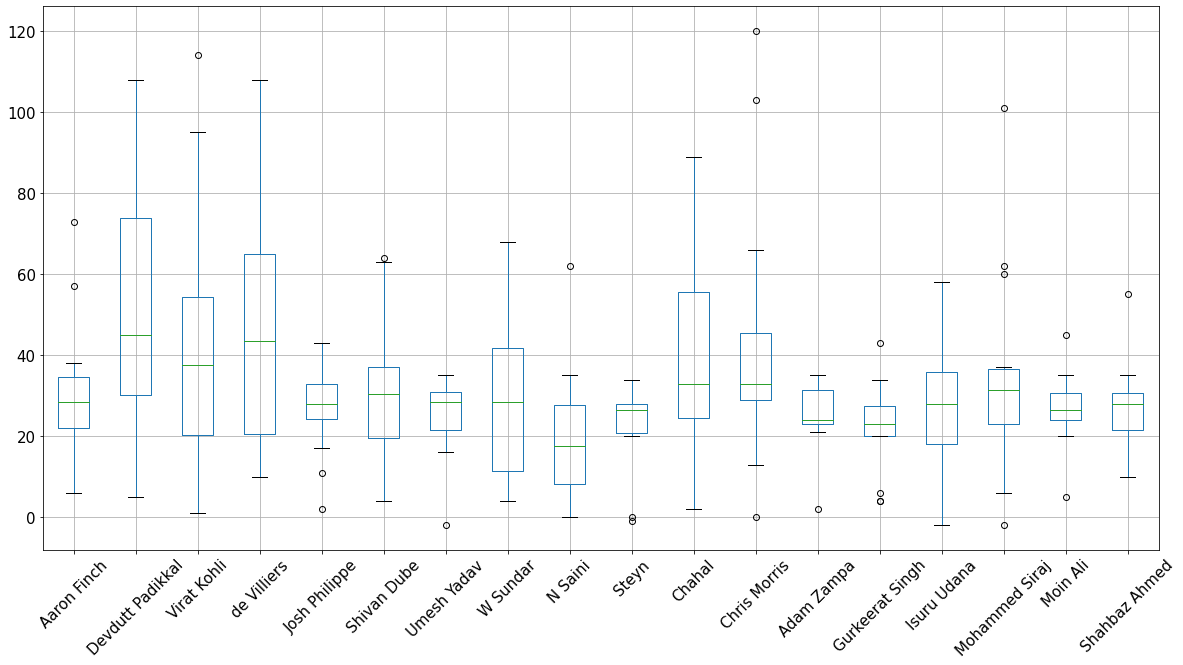

In [72]:
df1.boxplot(figsize=(20,10), rot=45, fontsize=15)